In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
try:
    import empyrical as emp
except:
    emp = None
import tushare as ts
import time
import datetime
import random
import seaborn as sns

from common.config import Config
from spider.spider_nasdaq import Spider_nasdaq
from spider.spider_coinmarketcap import Spider_coinmarketcap

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts

In [10]:
# df = pd.read_csv('../database/20190211-123729.csv')
df = pd.read_csv('../database/20190211-171240.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()

# df2 = pd.read_csv('../database/20190209-121828.csv')
# len(df2)
# df2 = df2.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])

190

,START,END,TURTLE_POS,ROLLMAX,ROLLMIN,ORDER,STOCK,RETURN,MAXDROPDOWN,WINRATE,annual_return,annual_volatility,calmar_ratio,sharpe_ratio,alpha,beta,ALL_DAYS,FREECASH_DAY,BENCHMARK_RETURN
0,2011-01-19,2018-11-01,1,10,20,44,1,-0.083706,-0.480992,0.418605,-0.015351,0.310854,-0.031915,0.108066,-0.055324,0.388390,1424,0,0.805869
1,2011-01-19,2018-11-01,1,10,30,29,1,0.001666,-0.385475,0.413793,0.000295,0.301551,0.000764,0.154323,-0.037129,0.365454,1424,0,0.805869
2,2011-01-19,2018-11-01,1,10,40,25,1,0.293688,-0.427173,0.520000,0.046622,0.310929,0.109142,0.304190,0.005645,0.388479,1424,0,0.805869
3,2011-01-19,2018-11-01,1,10,50,18,1,0.498658,-0.274634,0.444444,0.074220,0.287175,0.270252,0.393927,0.037268,0.331353,1424,0,0.805869
4,2011-01-19,2018-11-01,1,10,60,13,1,0.724541,-0.314297,0.307692,0.101243,0.304525,0.322126,0.470357,0.057925,0.372639,1424,0,0.805869


In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# df = pd.read_csv('../database/2014-2018-TT-PARAMTEST-MA-ALLRANDOM.csv')
# df = pd.read_csv('../database/20181031-112659.csv')
# df = pd.read_csv('../database/2013-2018-ZZ500-TT-PARAMTEST.csv')
# df = pd.read_csv('../database/2013-2018-ZZ500-MA-PARAMTEST.csv')
df = pd.read_csv('../database/20190208-170136.csv')
# df = pd.read_csv('../database/20181118-074036.csv')

df.columns
# df.head(2)

df = df.loc[:, ['ROLLMAX', 'ROLLMIN', 'RETURN', 'MAXDROPDOWN', 'BENCHMARK_RETURN']]
# df

# d_df = df.groupby(by=['ROLLMAX', 'ROLLMIN']).describe().reset_index()
# d_df

# df = df.groupby(by=['ROLLMAX', 'ROLLMIN']).describe().reset_index()
df = df.groupby(by=['ROLLMAX', 'ROLLMIN']).mean().reset_index()
# df.columns
# df


X = df['ROLLMAX']
Y = df['ROLLMIN']
Z = df['RETURN']
# ax.scatter(X, Y, Z, c='b', marker='o')
# ax.bar(X, Z, zs=Y, zdir='y', color='b', alpha=0.2, hatch='', linestyle='dashdot')
# X, Y, Z = axes3d.get_test_data(0.05)
# X
# Z
# ax.plot_wireframe(X, Y, Z)

md = Z.median()
md = Z.mean()
md = Z.describe(percentiles=[.75, .90, .95])['95%']
# .norm.interval(0.96,mean,std)

df_d = df.loc[df['RETURN'] >= md]
df_d

X = df_d['ROLLMAX']
Y = df_d['ROLLMIN']
Z = df_d['RETURN']
# ax.scatter(X, Y, Z, c='r', marker='o')
ax.bar(X, Z, zs=Y, zdir='y', color='r', alpha=0.4)

df_d = df.loc[(df['RETURN'] < md) & (df['RETURN'] > 0)]
X = df_d['ROLLMAX']
Y = df_d['ROLLMIN']
Z = df_d['RETURN']
# ax.scatter(X, Y, Z, c='b', marker='^')
# ax.bar(X, Z, zs=Y, zdir='y', color='b', alpha=0.2)

ax.set_xlabel('X ROLLMAX')
ax.set_ylabel('Y ROLLMIN')
ax.set_zlabel('Z RETURN')

# ax.set_yticks(Y)

df = df.loc[:, ['ROLLMAX', 'ROLLMIN', 'RETURN']]
# df[df['TURTLE_POS'] == 10]

In [ ]:
df['RETURN_HS300'] = df2['RETURN']
# df.head()

# df.sort_values()
df = df[(df.RETURN > 0.6) & (df.RETURN_HS300 > 0.3)]
# df = df.sort_values(by='RETURN', ascending=False)
df

ROLLMIN,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200
ROLLMAX,,,,,,,,,,,,,,,,,,,
10,-0.083706,0.001666,0.293688,0.498658,0.724541,0.739105,0.749292,0.530423,0.518348,0.497274,0.773424,0.667655,0.469678,0.567182,0.955851,0.623803,0.467489,0.520297,0.420088
20,NaN,0.062306,0.237097,0.505922,0.611787,1.224199,0.831340,0.759123,0.799839,0.539425,0.202086,0.627241,0.635567,0.942816,0.939766,0.759306,0.586277,0.662152,0.564294
30,NaN,NaN,0.391973,0.372559,1.006238,0.940620,1.031929,0.980568,0.659703,0.311943,0.257995,0.582185,0.733415,0.545352,0.804113,0.566853,0.516315,0.471245,0.604782
40,NaN,NaN,NaN,1.014958,1.185275,0.880258,0.801278,0.555293,0.706713,0.381624,0.532194,0.441144,0.484733,0.539369,0.443966,0.481339,0.549964,0.410281,0.552661
50,NaN,NaN,NaN,NaN,1.514775,1.010680,0.616113,0.720052,0.642291,0.357395,0.095918,0.186325,0.302666,0.272205,0.403553,0.451464,0.551324,0.413042,0.497056
60,NaN,NaN,NaN,NaN,NaN,0.968681,0.647478,0.947232,0.266726,0.012962,0.288970,0.194394,0.355884,0.374625,0.330118,0.381495,0.417268,0.411700,0.466084
70,NaN,NaN,NaN,NaN,NaN,NaN,0.597307,0.405868,0.313178,0.183886,0.619443,0.284556,0.380827,0.403765,0.546151,0.667826,0.758737,0.735643,0.566925
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.902423,0.200095,0.541116,0.487919,0.231412,0.212875,0.410434,0.653182,0.649003,0.788874,0.703244,0.680556
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625849,0.583957,0.432333,0.337071,0.532850,0.492477,0.825377,0.779350,0.946060,0.877786,0.875067


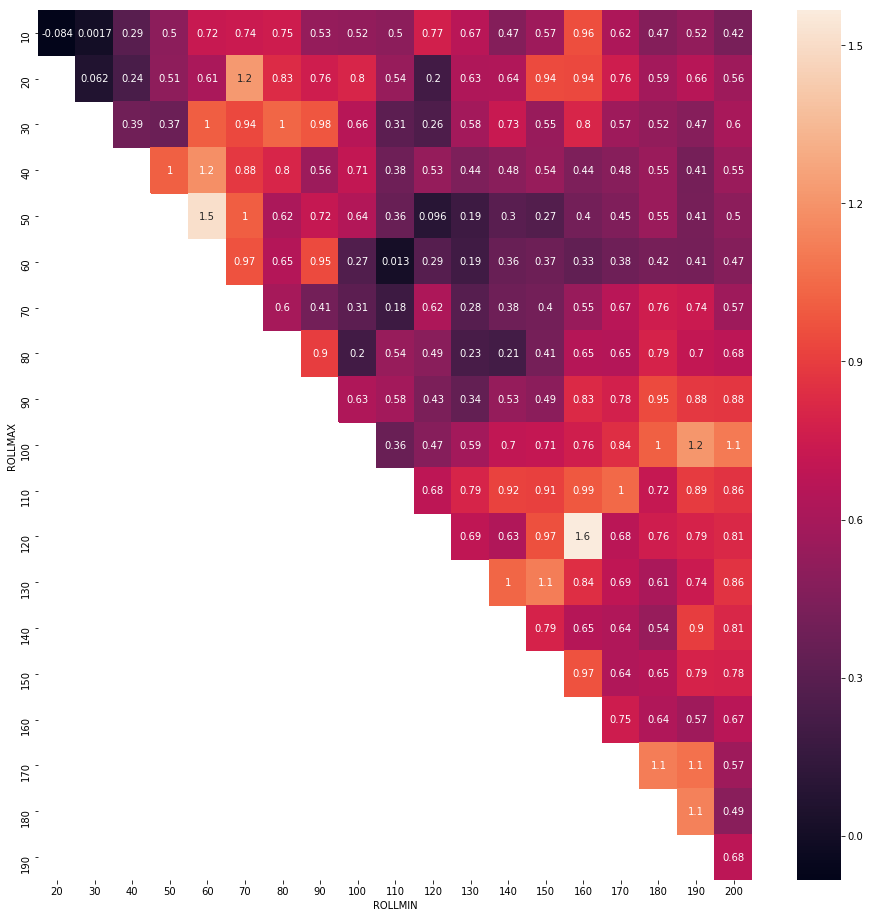

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

# uniform_data = np.random.rand(10, 10)
# ax = sns.heatmap(uniform_data, annot=True)